In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree


In [ ]:
from google.colab import files
upload= files.upload()

Saving AKWA IBOM ELECTION RESULTS.xlsx to AKWA IBOM ELECTION RESULTS.xlsx


In [ ]:
import pandas as pd
df=pd.read_excel('AKWA IBOM ELECTION RESULTS.xlsx')

In [ ]:
df.head()

,State,Ward,PU-Code,PU-Name,Latitude,Longitude,Distance (KM),Accredited_Voters,Registered_Voters,Results_Found,...,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Unnamed: 20,Results_File
0,AKWA IBOM,ABAK,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",5.043596,7.692120,91.267546,179,750,True,...,False,False,False,UNKNOWN,0,0,0,0,NaN,https://docs.inecelectionresults.net/elections...
1,AKWA IBOM,ABAK,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",4.857940,7.762043,0.000000,140,750,True,...,False,False,False,UNKNOWN,8,21,30,1,NaN,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2,AKWA IBOM,ABAK,03-01-01-006,PRY SCH IBANANG EDIENE,4.857940,7.762043,126.681120,210,750,True,...,False,False,False,UNKNOWN,105,45,43,0,NaN,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3,AKWA IBOM,ABAK,03-01-01-010,"NCSS, IKOT IYIRE",4.633193,7.602612,28.058120,208,755,True,...,False,False,False,UNKNOWN,108,27,43,2,NaN,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
4,AKWA IBOM,ABAK,03-01-01-011,"VILLAGE SQUARE, IKOT AKAN ADIA",4.606351,7.657524,190.378512,161,468,True,...,False,False,False,UNKNOWN,76,19,56,0,NaN,https://inec-cvr-cache.s3.eu-west-1.amazonaws....


In [ ]:
df.isnull().sum()

State                       0
Ward                        0
PU-Code                     0
PU-Name                     0
Latitude                    0
Longitude                   0
Distance (KM)               0
Accredited_Voters           0
Registered_Voters           0
Results_Found               0
Transcription_Count         0
Result_Sheet_Stamped        0
Result_Sheet_Corrected      0
Result_Sheet_Invalid        0
Result_Sheet_Unclear        0
Result_Sheet_Unsigned       0
APC                         0
LP                          0
PDP                         0
NNPP                        0
Unnamed: 20               342
Results_File                0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 20'], inplace=True)

In [ ]:
df.head()

,State,Ward,PU-Code,PU-Name,Latitude,Longitude,Distance (KM),Accredited_Voters,Registered_Voters,Results_Found,...,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File
0,AKWA IBOM,ABAK,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",5.043596,7.692120,91.267546,179,750,True,...,False,False,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...
1,AKWA IBOM,ABAK,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",4.857940,7.762043,0.000000,140,750,True,...,False,False,False,False,UNKNOWN,8,21,30,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2,AKWA IBOM,ABAK,03-01-01-006,PRY SCH IBANANG EDIENE,4.857940,7.762043,126.681120,210,750,True,...,False,False,False,False,UNKNOWN,105,45,43,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3,AKWA IBOM,ABAK,03-01-01-010,"NCSS, IKOT IYIRE",4.633193,7.602612,28.058120,208,755,True,...,False,False,False,False,UNKNOWN,108,27,43,2,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
4,AKWA IBOM,ABAK,03-01-01-011,"VILLAGE SQUARE, IKOT AKAN ADIA",4.606351,7.657524,190.378512,161,468,True,...,False,False,False,False,UNKNOWN,76,19,56,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....


In [ ]:
df.shape

(342, 21)

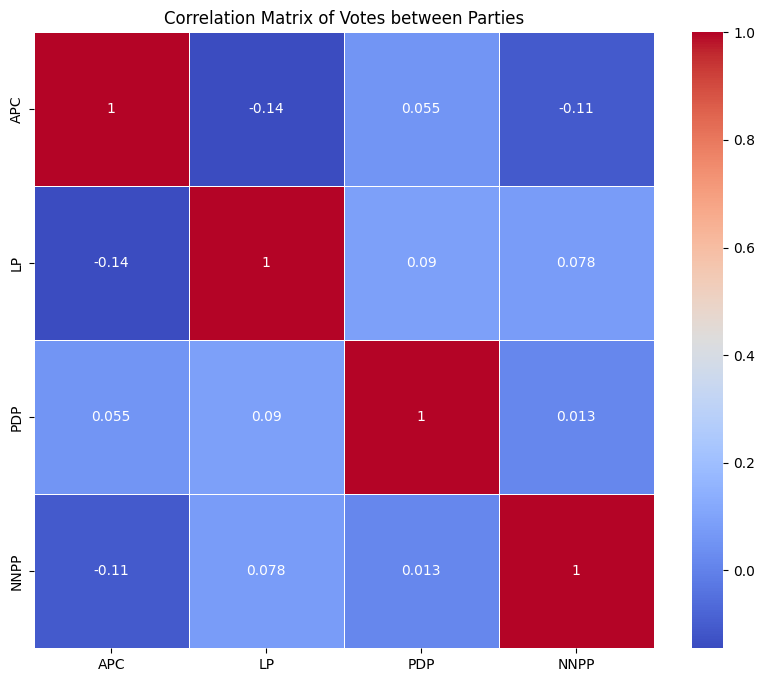

In [ ]:
party_columns = ['APC', 'LP', 'PDP', 'NNPP']
df_parties = df[party_columns]

# Calculate the correlation matrix
correlation_matrix = df_parties.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Votes between Parties')
plt.show()

In [ ]:
!pip install geopy
from geopy.distance import geodesic


In [ ]:
required_columns = ['State', 'Ward', 'PU-Code', 'PU-Name', 'Accredited_Voters', 'Registered_Voters',
                    'Results_Found', 'Transcription_Count', 'Result_Sheet_Stamped', 'Result_Sheet_Corrected',
                    'Result_Sheet_Invalid', 'Result_Sheet_Unclear', 'Result_Sheet_Unsigned', 'APC', 'LP',
                    'PDP', 'NNPP', 'Results_File', 'Latitude', 'Longitude']

# Verify the required columns are present in the DataFrame
if not all(column in df.columns for column in required_columns):
    raise ValueError("One or more required columns are missing from the dataset")

In [ ]:
df = df[required_columns]

# Function to find neighbors within a given radius (in kilometers)
def find_neighbors(df, radius=1.0):
    neighbors = []
    for i, row in df.iterrows():
        row_neighbors = []
        for j, compare_row in df.iterrows():
            if i != j:
                distance = geodesic((row['Latitude'], row['Longitude']),
                                    (compare_row['Latitude'], compare_row['Longitude'])).km
                if distance <= radius:
                    row_neighbors.append(j)
        neighbors.append(row_neighbors)
    return neighbors

# Add the neighbors information to the DataFrame
df['neighbors'] = find_neighbors(df)

# Display the DataFrame with neighbors
df.head()

,State,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,...,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,Latitude,Longitude,neighbors
0,AKWA IBOM,ABAK,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,-1,False,False,...,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...,5.043596,7.692120,[]
1,AKWA IBOM,ABAK,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",140,750,True,-1,False,False,...,False,UNKNOWN,8,21,30,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,4.857940,7.762043,[2]
2,AKWA IBOM,ABAK,03-01-01-006,PRY SCH IBANANG EDIENE,210,750,True,-1,False,False,...,False,UNKNOWN,105,45,43,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,4.857940,7.762043,[1]
3,AKWA IBOM,ABAK,03-01-01-010,"NCSS, IKOT IYIRE",208,755,True,-1,False,False,...,False,UNKNOWN,108,27,43,2,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,4.633193,7.602612,[]
4,AKWA IBOM,ABAK,03-01-01-011,"VILLAGE SQUARE, IKOT AKAN ADIA",161,468,True,-1,False,False,...,False,UNKNOWN,76,19,56,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,4.606351,7.657524,[133]


In [ ]:
df = df[required_columns]

# Convert latitude and longitude to radians for accurate distance calculations
df['Latitude_rad'] = np.radians(df['Latitude'])
df['Longitude_rad'] = np.radians(df['Longitude'])

# Create a KDTree for fast spatial queries
coords = df[['Latitude_rad', 'Longitude_rad']].values
tree = cKDTree(coords)

# Define the radius in kilometers (Earth radius is approximately 6371 km)
radius_km = 1.0
radius_rad = radius_km / 6371.0

# Find neighbors within the radius
def find_neighbors_optimized(tree, coords, radius_rad):
    neighbors = []
    for i, coord in enumerate(coords):
        indices = tree.query_ball_point(coord, radius_rad)
        indices = [idx for idx in indices if idx != i]  # Exclude self from neighbors
        neighbors.append(indices)
    return neighbors

df['neighbors'] = find_neighbors_optimized(tree, coords, radius_rad)

# Drop the temporary radian columns
df.drop(columns=['Latitude_rad', 'Longitude_rad'], inplace=True)

# Function to map indices to polling unit names
def map_neighbors_to_names(df, neighbors_column='neighbors', name_column='PU-Name'):
    neighbors_names = []
    for neighbors in df[neighbors_column]:
        names = df.iloc[neighbors][name_column].tolist()
        neighbors_names.append(names)
    return neighbors_names

# Add a new column with the names of the neighboring polling units
df['neighbor_names'] = map_neighbors_to_names(df)

# Display the DataFrame with neighbor names
df.head()

,State,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,...,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,Latitude,Longitude,neighbors,neighbor_names
0,AKWA IBOM,ABAK,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,-1,False,False,...,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...,5.043596,7.692120,[],[]
1,AKWA IBOM,ABAK,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",140,750,True,-1,False,False,...,UNKNOWN,8,21,30,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,4.857940,7.762043,[2],[PRY SCH IBANANG EDIENE]
2,AKWA IBOM,ABAK,03-01-01-006,PRY SCH IBANANG EDIENE,210,750,True,-1,False,False,...,UNKNOWN,105,45,43,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,4.857940,7.762043,[1],"[VILLAGE SQUARE, ATAI EDIENE]"
3,AKWA IBOM,ABAK,03-01-01-010,"NCSS, IKOT IYIRE",208,755,True,-1,False,False,...,UNKNOWN,108,27,43,2,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,4.633193,7.602612,[],[]
4,AKWA IBOM,ABAK,03-01-01-011,"VILLAGE SQUARE, IKOT AKAN ADIA",161,468,True,-1,False,False,...,UNKNOWN,76,19,56,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,4.606351,7.657524,[133],"[V/HALL, IKOT AKAN]"


In [ ]:
party_columns = ['APC', 'LP', 'PDP', 'NNPP']

# Function to calculate the average votes of neighbors
def calculate_average_votes(df, neighbors_column, party_columns):
    for party in party_columns:
        avg_votes = []
        for neighbors in df[neighbors_column]:
            if neighbors:  # Check if neighbors list is not empty
                avg_vote = df.iloc[neighbors][party].mean()
            else:
                avg_vote = np.nan
            avg_votes.append(avg_vote)
        df[f'{party}_avg_votes'] = avg_votes
    return df

# Add average votes of neighbors to the DataFrame
df = calculate_average_votes(df, 'neighbors', party_columns)

# Function to calculate outlier scores
def calculate_outlier_scores(df, party_columns):
    for party in party_columns:
        df[f'{party}_outlier_score'] = abs(df[party] - df[f'{party}_avg_votes'])
    return df

# Add outlier scores to the DataFrame
df = calculate_outlier_scores(df, party_columns)

# Display the DataFrame with outlier scores
df.head()

,State,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,...,neighbors,neighbor_names,APC_avg_votes,LP_avg_votes,PDP_avg_votes,NNPP_avg_votes,APC_outlier_score,LP_outlier_score,PDP_outlier_score,NNPP_outlier_score
0,AKWA IBOM,ABAK,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,-1,False,False,...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AKWA IBOM,ABAK,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",140,750,True,-1,False,False,...,[2],[PRY SCH IBANANG EDIENE],105.0,45.0,43.0,0.0,97.0,24.0,13.0,1.0
2,AKWA IBOM,ABAK,03-01-01-006,PRY SCH IBANANG EDIENE,210,750,True,-1,False,False,...,[1],"[VILLAGE SQUARE, ATAI EDIENE]",8.0,21.0,30.0,1.0,97.0,24.0,13.0,1.0
3,AKWA IBOM,ABAK,03-01-01-010,"NCSS, IKOT IYIRE",208,755,True,-1,False,False,...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AKWA IBOM,ABAK,03-01-01-011,"VILLAGE SQUARE, IKOT AKAN ADIA",161,468,True,-1,False,False,...,[133],"[V/HALL, IKOT AKAN]",157.0,30.0,58.0,0.0,81.0,11.0,2.0,0.0


In [ ]:
df.to_excel('sorted_outliers.xlsx', index=False)